<a href="https://colab.research.google.com/github/atik81/AI/blob/main/fcw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install Keras

In [ ]:
%pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/'


 AI		    comments.csv  'datasciemce sprint 2'
'Colab Notebooks'   cw1ml.ipynb   'datascience 2 sprint2'


In [ ]:
pip install flask

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 518 images belonging to 5 classes.
Found 127 images belonging to 5 classes.
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 3.0160 - accuracy: 0.2008

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 199s 12s/step - loss: 3.0160 - accuracy: 0.2008 - val_loss: 1.6075 - val_accuracy: 0.2913
Epoch 2/5
17/17 [==============================] - 25s 1s/step - loss: 1.6062 - accuracy: 0.3069 - val_loss: 1.5946 - val_accuracy: 0.4252
Epoch 3/5
17/17 [==============================] - 28s 2s/step - loss: 1.4854 - accuracy: 0.3069 - val_loss: 1.3656 - val_accuracy: 0.3780
Epoch 4/5
17/17 [==============================] - 28s 2s/step - loss: 1.3048 - accuracy: 0.4286 - val_loss: 1.3455 - val_accuracy: 0.4252
Epoch 5/5
17/17 [==============================] - 27s 2s/step - loss: 1.2167 - accuracy: 0.4595 - val_loss: 1.3041 - val_accuracy: 0.3701
Validation loss: 1.2746120691299438
Validation accuracy: 0.4251968562602997


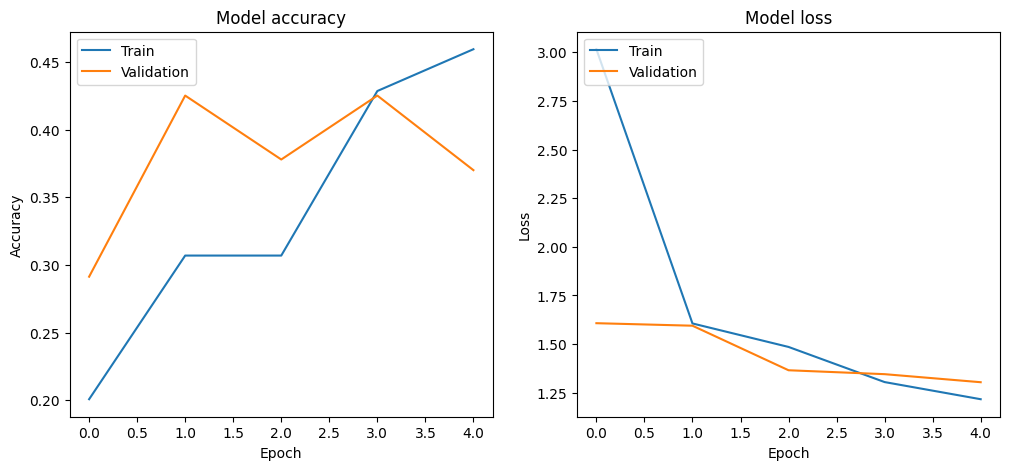

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Define the paths to the flower dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/flowers'

# Create the training generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Create the validation generator
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=2),
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # Assuming there are 5 classes in your flower dataset
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with a checkpoint to save the best model
checkpoint = ModelCheckpoint('flower_model.h5', save_best_only=True)
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[checkpoint]
)

# Evaluate the model using the best saved model
model.load_weights('flower_model.h5')
score = model.evaluate(validation_generator, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Image upload and prediction code would go here
# ...


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 518 images belonging to 5 classes.
Found 127 images belonging to 5 classes.
Epoch 1/5
17/17 [==============================] - 15s 809ms/step - loss: 1.6489 - accuracy: 0.2587 - val_loss: 1.5308 - val_accuracy: 0.2441
Epoch 2/5
17/17 [==============================] - 16s 980ms/step - loss: 1.5230 - accuracy: 0.3224 - val_loss: 1.4548 - val_accuracy: 0.3701
Epoch 3/5
17/17 [==============================] - 16s 925ms/step - loss: 1.4707 - accuracy: 0.3475 - val_loss: 1.4073 - val_accuracy: 0.3937
Epoch 4/5
17/17 [==============================] - 14s 845ms/step - loss: 1.4251 - accuracy: 0.3938 - val_loss: 1.5118 - val_accuracy: 0.3701
Epoch 5/5
17/17 [==============================] - 12s 703ms/step - loss: 1.3739 - accuracy: 0.4344 - val_loss: 1.3457 - val_accuracy: 0.4094
Validation loss: 1.3151851892471313
Validation accuracy: 0.4488188922405243


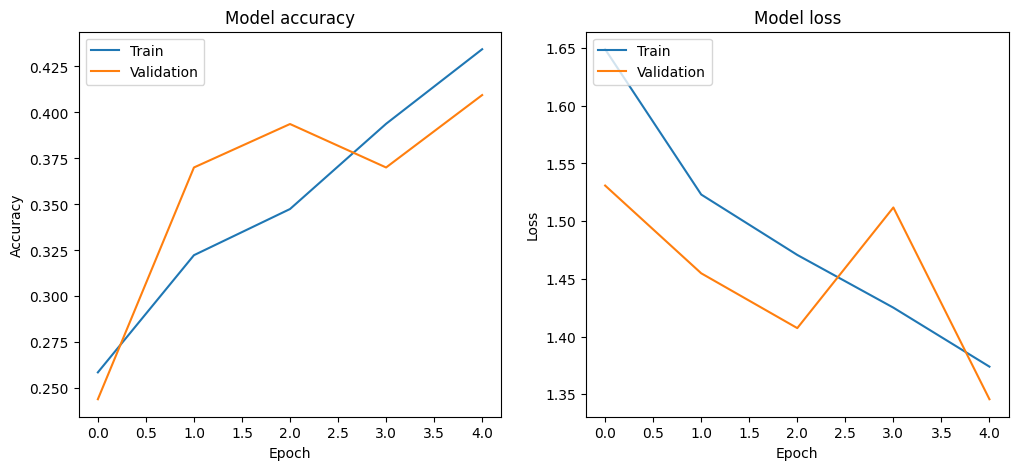

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.optimizers import SGD

# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Define the paths to the flower dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/flowers'

# Create the training generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Create the validation generator
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Build the CNN model
model = Sequential([
    Conv2D(16, kernel_size=3, activation='relu', input_shape=(150, 150, 3)),  # Reduced filters
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),  # Reduced neurons
    Dense(5, activation='softmax')  # Assuming 5 classes in the dataset
])
sgd = SGD(learning_rate=0.1)  # Increased learning rate (default is usually around 0.01)

# Compile the model with SGD optimizer
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with a checkpoint to save the best model
checkpoint = ModelCheckpoint('flower_model.h5', save_best_only=True)
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[checkpoint]
)

# Evaluate the model using the best saved model
model.load_weights('flower_model.h5')
score = model.evaluate(validation_generator, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Image upload and prediction code would go here
# ...


4/4 [==============================] - 2s 523ms/step - loss: 1.5903 - accuracy: 0.2835
Classification accuracy on the validation set:  0.28346458077430725
1/1 [==============================] - 0s 96ms/step


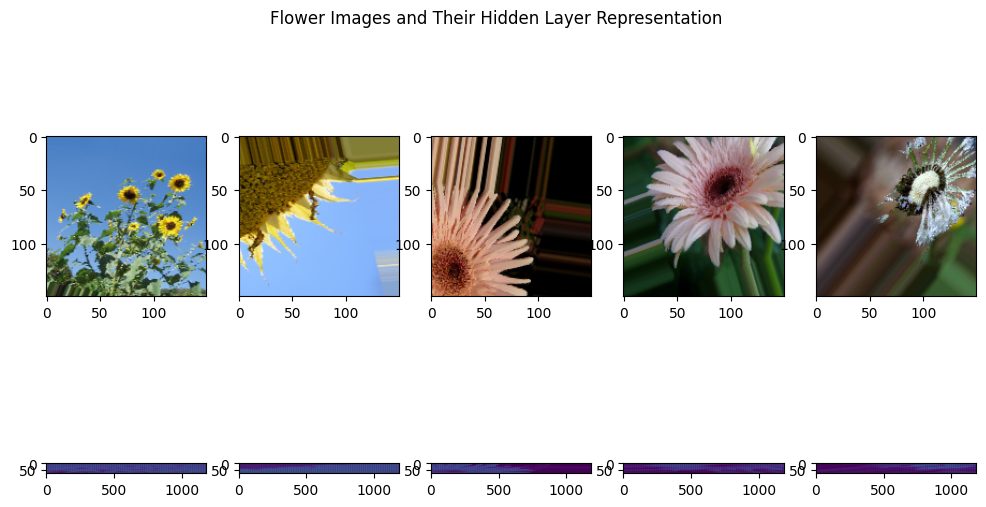

1/1 [==============================] - 0s 33ms/step


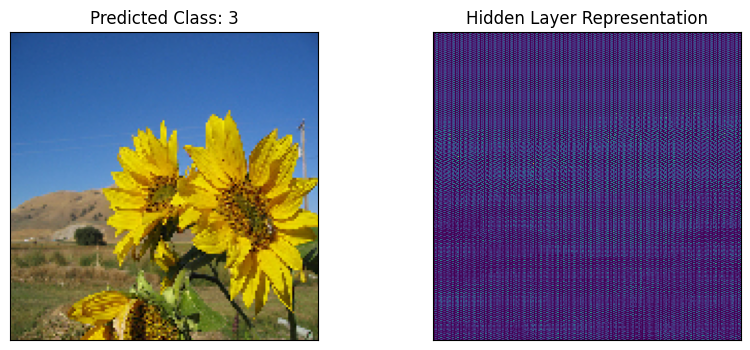

In [ ]:
def get_hidden_layer_output(model, generator, index):
    # Extract an image and its label from the generator
    image, label = generator.next()

    # If image is a single image, add an extra dimension
    if len(image.shape) == 3:
        image = np.expand_dims(image, axis=0)

    # Get the hidden layer output
    hidden_tensor = model.layers[1](model.layers[0](image))

    # Get the predicted digit
    predicted_digit = np.argmax(model.predict(image), axis=1)[0]

    return image[0], hidden_tensor[0], predicted_digit

# Define the ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Predictions and Evaluation
test_loss, test_acc = model.evaluate(validation_generator)
print('Classification accuracy on the validation set: ', test_acc)

# Visualization of images along with hidden layer representation
max_columns = 5 # Assuming there are 5 classes in your dataset
num_classes = 5

# Initialize a counter for each class
class_counters = {i: 0 for i in range(num_classes)}

# Define the maximum number of columns for your subplot
max_columns = 5  # Replace with the maximum number you want

# Create your plot layout here
total_cols = min(len(class_counters), max_columns)


# ... Rest of your code for testing the model on a specific image ...

# Create your plot layout here, if not already done
total_cols = min(len(class_counters), max_columns)
fig, ax = plt.subplots(2, total_cols, figsize=(12, 6))


# Assuming there are 5 classes in your flower dataset
num_classes = 5

# Initialize a counter for each class
class_counters = {i: 0 for i in range(num_classes)}

for j in range(total_cols):
    try:
        image, h, prediction = get_hidden_layer_output(model, validation_generator, class_counters[j])
        ax[0, j].imshow(image)

        # Reshape to a 2D shape for visualization
        reshaped_h = np.reshape(h.numpy(), (74, 74*16))  # or (5476, 16), depending on which visualization is more meaningful
        ax[1, j].imshow(reshaped_h)
    except KeyError as e:
        print(f"Key error encountered: {e}")
        # Handle the key error or break the loop if needed
    except ValueError as e:
        print(f"Value error encountered: {e}")
        # Handle the value error


    # Increment the counter for the current class with modulo to cycle back
    class_counters[j] = (class_counters[j] + 1) % len(validation_generator.class_indices)

plt.suptitle('Flower Images and Their Hidden Layer Representation', y=1.05)
plt.show()

# Testing the model on a specific image
# Replace the placeholder with your actual image file path
test_image_path = '/content/45045005_57354ee844.jpg'
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(150, 150))
test_image_array = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

test_image_array /= 255.0  # Normalize the pixel values

# Get the hidden layer output for the test image
test_hidden_tensor = model.layers[1](model.layers[0](test_image_array))

# Get the predicted digit
predicted_digit = np.argmax(model.predict(test_image_array), axis=1)[0]

# Visualization of the test image along with hidden layer representation
fig, ax = plt.subplots(1, 2, figsize=(10, 4), subplot_kw=dict(xticks=[], yticks=[]))

ax[0].imshow(test_image)
ax[0].set_title('Predicted Class: ' + str(predicted_digit))

ax[1].imshow(np.reshape(test_hidden_tensor.numpy(), (296, 296)))  # Adjust the shape if needed
ax[1].set_title('Hidden Layer Representation')

plt.show()

4/4 [==============================] - 2s 406ms/step - loss: 1.5921 - accuracy: 0.2835
Classification accuracy on the validation set:  0.28346458077430725
1/1 [==============================] - 0s 96ms/step


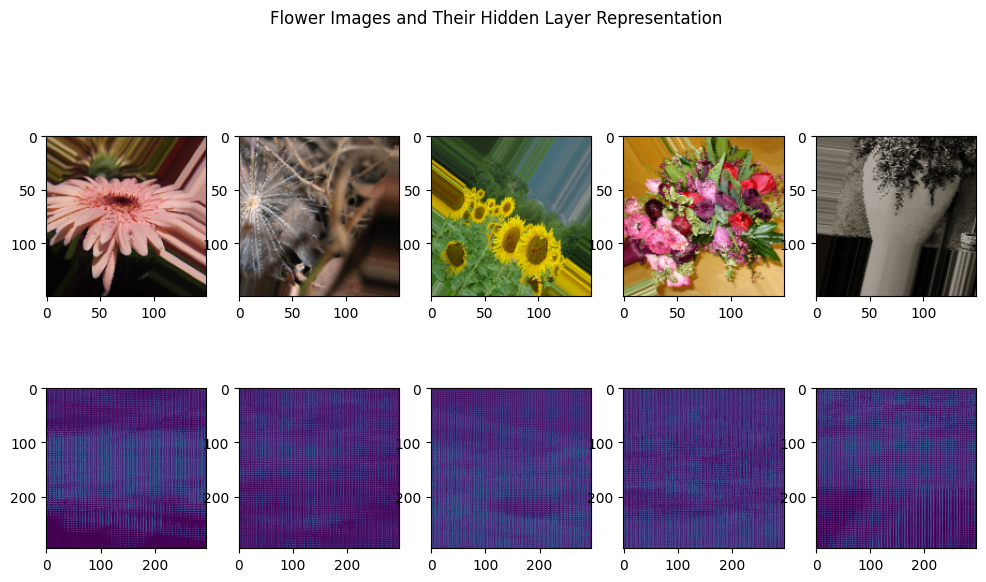

1/1 [==============================] - 0s 47ms/step


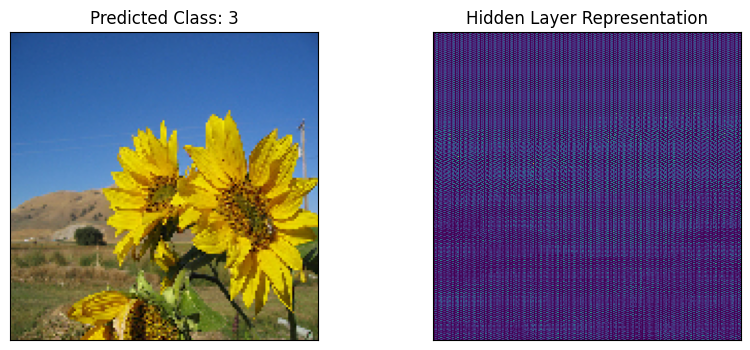

In [ ]:
def get_hidden_layer_output(model, generator, index):
    # Extract an image and its label from the generator
    image, label = generator.next()

    # If image is a single image, add an extra dimension
    if len(image.shape) == 3:
        image = np.expand_dims(image, axis=0)

    # Get the hidden layer output
    hidden_tensor = model.layers[1](model.layers[0](image))

    # Get the predicted digit
    predicted_digit = np.argmax(model.predict(image), axis=1)[0]

    return image[0], hidden_tensor[0], predicted_digit

# Define the ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Predictions and Evaluation
test_loss, test_acc = model.evaluate(validation_generator)
print('Classification accuracy on the validation set: ', test_acc)

# Visualization of images along with hidden layer representation
max_columns = 5 # Assuming there are 5 classes in your dataset
num_classes = 5

# Initialize a counter for each class
class_counters = {i: 0 for i in range(num_classes)}

# Define the maximum number of columns for your subplot
max_columns = 5  # Replace with the maximum number you want

# Create your plot layout here
total_cols = min(len(class_counters), max_columns)


# ... Rest of your code for testing the model on a specific image ...

# Create your plot layout here, if not already done
total_cols = min(len(class_counters), max_columns)
fig, ax = plt.subplots(2, total_cols, figsize=(12, 6))


# Assuming there are 5 classes in your flower dataset
num_classes = 5

# Initialize a counter for each class
class_counters = {i: 0 for i in range(num_classes)}
for j in range(total_cols):
    try:
        image, h, prediction = get_hidden_layer_output(model, validation_generator, class_counters[j])
        ax[0, j].imshow(image)

        # Reshape h to a 2D shape for visualization
        reshaped_h = np.reshape(h.numpy(), (296, 296))  # Adjusted shape
        ax[1, j].imshow(reshaped_h)

        # Increment the counter for the current class
        class_counters[j] = (class_counters[j] + 1) % num_classes

    except KeyError as e:
        print(f"Key error encountered: {e}")
    except ValueError as e:
        print(f"Value error encountered: {e}")

    # Increment the counter for the current class with modulo to cycle back
    class_counters[j] = (class_counters[j] + 1) % len(validation_generator.class_indices)

plt.suptitle('Flower Images and Their Hidden Layer Representation', y=1.05)
plt.show()

# Testing the model on a specific image
# Replace the placeholder with your actual image file path
test_image_path = '/content/45045005_57354ee844.jpg'
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(150, 150))
test_image_array = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

test_image_array /= 255.0  # Normalize the pixel values

# Get the hidden layer output for the test image
test_hidden_tensor = model.layers[1](model.layers[0](test_image_array))

# Get the predicted digit
predicted_digit = np.argmax(model.predict(test_image_array), axis=1)[0]

# Visualization of the test image along with hidden layer representation
fig, ax = plt.subplots(1, 2, figsize=(10, 4), subplot_kw=dict(xticks=[], yticks=[]))

ax[0].imshow(test_image)
ax[0].set_title('Predicted Class: ' + str(predicted_digit))

# Ensure the reshape size matches the size of test_hidden_tensor
test_hidden_reshaped = np.reshape(test_hidden_tensor.numpy(), (296, 296))  # Adjusted shape
ax[1].imshow(test_hidden_reshaped)
ax[1].set_title('Hidden Layer Representation')

plt.show()

4/4 [==============================] - 2s 421ms/step - loss: 1.5919 - accuracy: 0.2913
Classification accuracy on the validation set:  0.29133859276771545
1/1 [==============================] - 0s 153ms/step


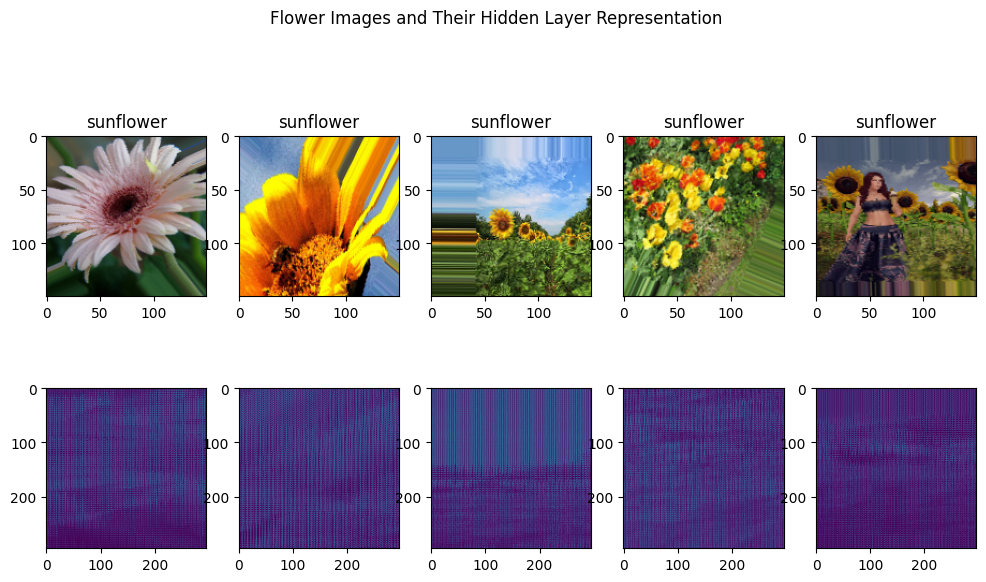

1/1 [==============================] - 0s 36ms/step


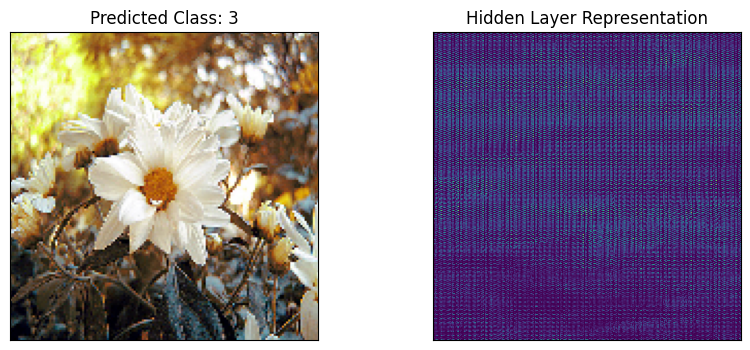

In [ ]:
def get_hidden_layer_output(model, generator, index):
    # Extract an image and its label from the generator
    image, label = generator.next()

    # If image is a single image, add an extra dimension
    if len(image.shape) == 3:
        image = np.expand_dims(image, axis=0)

    # Get the hidden layer output
    hidden_tensor = model.layers[1](model.layers[0](image))

    # Get the predicted digit
    predicted_digit = np.argmax(model.predict(image), axis=1)[0]

    return image[0], hidden_tensor[0], predicted_digit

# Define the ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Predictions and Evaluation
test_loss, test_acc = model.evaluate(validation_generator)
print('Classification accuracy on the validation set: ', test_acc)

# Visualization of images along with hidden layer representation
max_columns = 5 # Assuming there are 5 classes in your dataset
num_classes = 5

# Initialize a counter for each class
class_counters = {i: 0 for i in range(num_classes)}

# Define the maximum number of columns for your subplot
max_columns = 5  # Replace with the maximum number you want

# Create your plot layout here
total_cols = min(len(class_counters), max_columns)


# ... Rest of your code for testing the model on a specific image ...

# Create your plot layout here, if not already done
total_cols = min(len(class_counters), max_columns)
# Visualization of images along with hidden layer representation
fig, ax = plt.subplots(2, num_classes, figsize=(12, 6))  # Adjusted to use num_classes directly

# Class names mapping (assuming the order is correct)
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

for j in range(num_classes):
    try:
        image, h, prediction = get_hidden_layer_output(model, validation_generator, class_counters[j])
        ax[0, j].imshow(image)
        ax[0, j].set_title(class_names[prediction])  # Display class name instead of numeric index

        # Reshape h to a 2D shape for visualization
        reshaped_h = np.reshape(h.numpy(), (296, 296))  # Adjusted shape
        ax[1, j].imshow(reshaped_h)

    except KeyError as e:
        print(f"Key error encountered: {e}")
    except ValueError as e:
        print(f"Value error encountered: {e}")

    # Increment the counter for the current class
    class_counters[j] = (class_counters[j] + 1) % num_classes

plt.suptitle('Flower Images and Their Hidden Layer Representation', y=1.05)
plt.show()

# Rest of your test image code remains the same


# Testing the model on a specific image
# Replace the placeholder with your actual image file path
test_image_path = '/content/54377391_15648e8d18.jpg'
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(150, 150))
test_image_array = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

test_image_array /= 255.0  # Normalize the pixel values

# Get the hidden layer output for the test image
test_hidden_tensor = model.layers[1](model.layers[0](test_image_array))

# Get the predicted digit
predicted_digit = np.argmax(model.predict(test_image_array), axis=1)[0]

# Visualization of the test image along with hidden layer representation
fig, ax = plt.subplots(1, 2, figsize=(10, 4), subplot_kw=dict(xticks=[], yticks=[]))

ax[0].imshow(test_image)
ax[0].set_title('Predicted Class: ' + str(predicted_digit))

# Ensure the reshape size matches the size of test_hidden_tensor
test_hidden_reshaped = np.reshape(test_hidden_tensor.numpy(), (296, 296))  # Adjusted shape
ax[1].imshow(test_hidden_reshaped)
ax[1].set_title('Hidden Layer Representation')

plt.show()

1/1 [==============================] - 0s 49ms/step


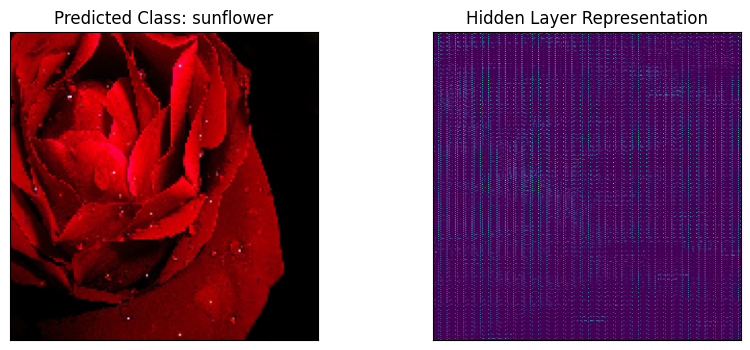

In [ ]:
test_image_path = '/content/353897245_5453f35a8e.jpg'
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(150, 150))
test_image_array = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

test_image_array /= 255.0  # Normalize the pixel values

# Get the hidden layer output for the test image
test_hidden_tensor = model.layers[1](model.layers[0](test_image_array))

# Get the predicted digit
predicted_digit = np.argmax(model.predict(test_image_array), axis=1)[0]

# Visualization of the test image along with hidden layer representation
fig, ax = plt.subplots(1, 2, figsize=(10, 4), subplot_kw=dict(xticks=[], yticks=[]))

ax[0].imshow(test_image)
ax[0].set_title('Predicted Class: ' + predicted_class_name)

# Ensure the reshape size matches the size of test_hidden_tensor
test_hidden_reshaped = np.reshape(test_hidden_tensor.numpy(), (296, 296))  # Adjusted shape
ax[1].imshow(test_hidden_reshaped)
ax[1].set_title('Hidden Layer Representation')

plt.show()

4/4 [==============================] - 3s 521ms/step - loss: 1.5883 - accuracy: 0.2992
Classification accuracy on the validation set:  0.29921260476112366
1/1 [==============================] - 0s 172ms/step


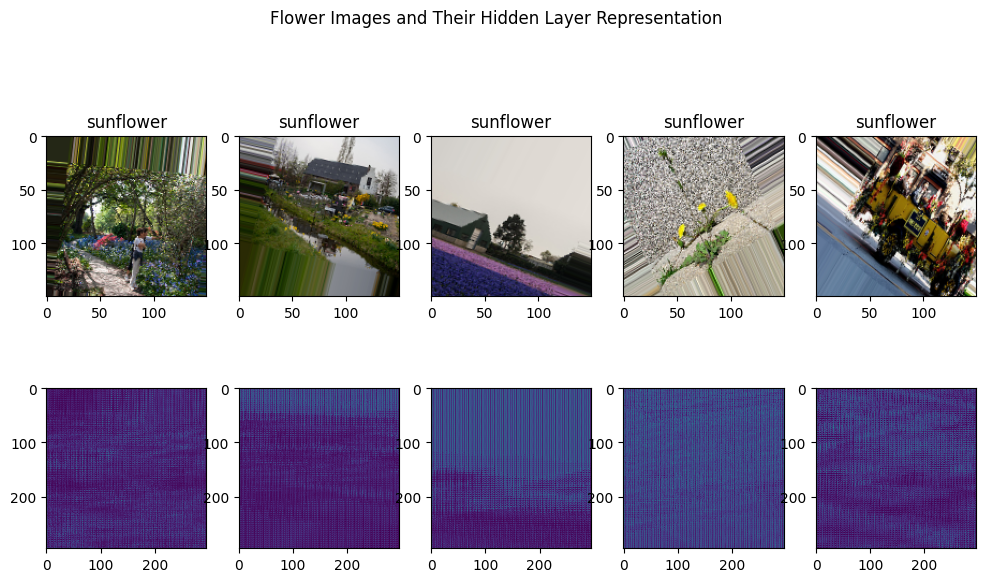

1/1 [==============================] - 0s 123ms/step


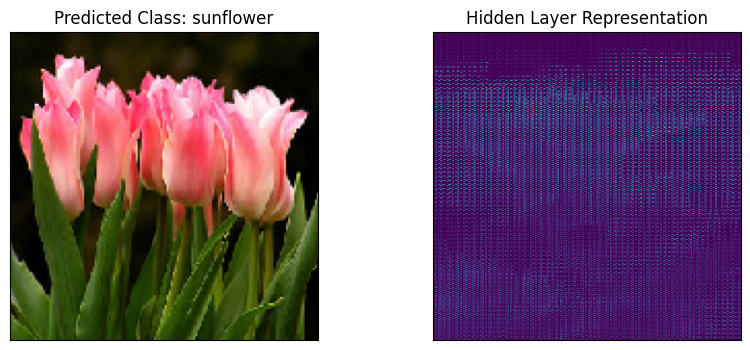

In [65]:
######################################finallll##################################################
def get_hidden_layer_output(model, generator, index):
    # Extract an image and its label from the generator
    image, label = generator.next()

    # If image is a single image, add an extra dimension
    if len(image.shape) == 3:
        image = np.expand_dims(image, axis=0)

    # Get the hidden layer output
    hidden_tensor = model.layers[1](model.layers[0](image))

    # Get the predicted digit
    predicted_digit = np.argmax(model.predict(image), axis=1)[0]

    return image[0], hidden_tensor[0], predicted_digit

# Define the ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Predictions and Evaluation
test_loss, test_acc = model.evaluate(validation_generator)
print('Classification accuracy on the validation set: ', test_acc)

# Visualization of images along with hidden layer representation
max_columns = 5 # Assuming there are 5 classes in your dataset
# Define the maximum number of columns for your subplot
num_classes = 5  # Number of classes in the dataset
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']  # Class names

# Create your plot layout here
fig, ax = plt.subplots(2, num_classes, figsize=(12, 6))

# Iterate over the batches from the generator
for j in range(num_classes):
    try:
        image, h, prediction_index = get_hidden_layer_output(model, validation_generator, j)
        predicted_class_name = class_names[prediction_index]  # Map index to class name

        ax[0, j].imshow(image)
        ax[0, j].set_title(predicted_class_name)

        # Reshape h to a 2D shape for visualization
        reshaped_h = np.reshape(h.numpy(), (296, 296))  # Adjusted shape
        ax[1, j].imshow(reshaped_h)

    except KeyError as e:
        print(f"Key error encountered: {e}")
    except ValueError as e:
        print(f"Value error encountered: {e}")

plt.suptitle('Flower Images and Their Hidden Layer Representation', y=1.05)
plt.show()
 #Testing the model on a specific image

test_image_path = '/content/112651128_7b5d39a346_m.jpg'  # Replace with your actual image file path
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(150, 150))
test_image_array = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)
test_image_array /= 255.0  # Normalize the pixel values

# Get the hidden layer output for the test image
test_hidden_tensor = model.layers[1](model.layers[0](test_image_array))

# Get the predicted class index
predicted_index = np.argmax(model.predict(test_image_array), axis=1)[0]
predicted_class_name = class_names[predicted_index]  # Map index to class name

# Visualization of the test image along with hidden layer representation
fig, ax = plt.subplots(1, 2, figsize=(10, 4), subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(test_image)
ax[0].set_title('Predicted Class: ' + predicted_class_name)

# Ensure the reshape size matches the size of test_hidden_tensor
test_hidden_reshaped = np.reshape(test_hidden_tensor.numpy(), (296, 296))  # Adjusted shape
ax[1].imshow(test_hidden_reshaped)
ax[1].set_title('Hidden Layer Representation')

plt.show()

#########################################################################################################################################

Please enter the path of the image: /content/45045005_57354ee844.jpg


1/1 [==============================] - 0s 95ms/step


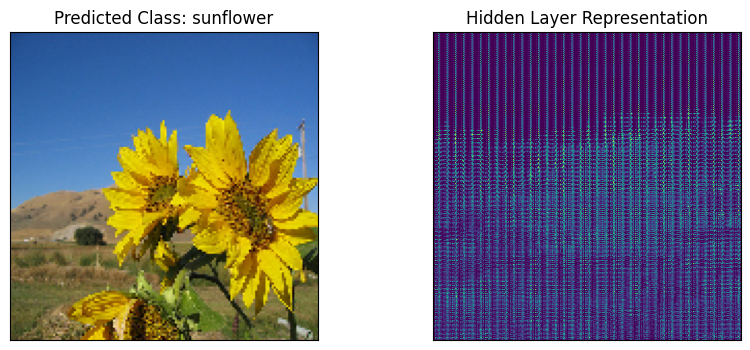

In [72]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image as tf_image
from tensorflow.keras.models import load_model
from gtts import gTTS
from IPython.display import Audio
import matplotlib.pyplot as plt

# [Your existing functions: upload_image and get_hidden_layer_output]

# Load your pre-trained model
model = load_model('flower_model.h5')  # Make sure the model path is correct
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']  # Class names

uploaded_image_path = input("Please enter the path of the image: ")
test_image_array = upload_image(uploaded_image_path)

test_hidden_tensor, predicted_index = get_hidden_layer_output(model, test_image_array)
predicted_class_name = class_names[predicted_index]

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(10, 4), subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(test_image_array[0])
ax[0].set_title('Predicted Class: ' + predicted_class_name)

test_hidden_reshaped = np.reshape(test_hidden_tensor.numpy(), (296, 296))
ax[1].imshow(test_hidden_reshaped)
ax[1].set_title('Hidden Layer Representation')

plt.show()

# Convert prediction to speech and play
tts = gTTS('Predicted Class: ' + predicted_class_name)
tts.save('prediction.mp3')
Audio('prediction.mp3', autoplay=True)


In [73]:
!pip install flask
!pip install flask-ngrok


In [9]:
!mkdir templates
with open('templates/index.html', 'w') as f:
    f.write('''
<!DOCTYPE html>
<html>
<body>
<h2>Upload Image</h2>
<form method="post" enctype="multipart/form-data">
    <input type="file" name="file">
    <input type="submit" value="Upload">
</form>
{% if prediction %}
    <h3>Predicted Class: {{ prediction }}</h3>
{% endif %}
</body>
</html>
''')


In [ ]:
from flask import Flask, request, render_template

app = Flask(__name__)

@app.route("/", methods=["GET", "POST"])
def index():
    if request.method == "POST":
        # Handle file upload and processing here
        uploaded_file = request.files['file']
        if uploaded_file.filename != '':
            image_path = "/content/" + uploaded_file.filename
            uploaded_file.save(image_path)
            test_image_array = upload_image(image_path)
            test_hidden_tensor, predicted_index = get_hidden_layer_output(model, test_image_array)
            predicted_class_name = class_names[predicted_index]
            return render_template("index.html", prediction=predicted_class_name)
    return render_template("index.html")

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
